In [1]:
import pandas as pd
import statistics as st

In [2]:
score_df = pd.read_csv("DS1_C4_S7_Students_Scores_Data_Practice.csv") 
score_df

,Statistics,Python,Tableau
0,61,86,66
1,54,86,72
2,56,80,78
3,54,85,45
4,53,84,68
...,...,...,...
95,60,76,64
96,59,89,70
97,62,80,46
98,58,89,74


Task 1
Use the measures of central tendency to identify the subject in which the students have shown the best performance.
While comparing the performance of three different subjects, one might just look at the average score in each subject and compare which subject has the highest average score and declare that subject as the one in which students have performed the best. Here, you need to look beyond the mean.
Hint: Use the measures of mean, median, and mode to perform this task.

In [3]:
Statistics_mean = score_df["Statistics"].mean()
Statistics_mean

60.89

In [4]:
Python_mean = score_df["Python"].mean()
Python_mean

81.84

In [5]:
Tableau_mean = score_df["Tableau"].mean()
Tableau_mean

68.02

In [6]:
print("Mean of the subjects \nstatistics=",Statistics_mean,"\n" "Python=",Python_mean,"\n" "Tableau=",Tableau_mean)

Mean of the subjects 
statistics= 60.89 
Python= 81.84 
Tableau= 68.02


In [7]:
sub_mean = [Statistics_mean, Python_mean, Tableau_mean]
sub_mean

[60.89, 81.84, 68.02]

In [8]:
Statistics_median = score_df["Statistics"].median()
Statistics_median

60.0

In [9]:
Python_median = score_df["Python"].median()
Python_median

82.0

In [10]:
Tableau_median = score_df["Tableau"].median()
Tableau_median

69.0

In [11]:
print("Median of the subjects \nstatistics=",Statistics_median,"\n" "Python=",Python_median,"\n" "Tableau=",Tableau_median)

Median of the subjects 
statistics= 60.0 
Python= 82.0 
Tableau= 69.0


In [12]:
sub_median = [Statistics_median, Python_median, Tableau_median]
sub_median

[60.0, 82.0, 69.0]

In [13]:
Statistics_mode= score_df["Statistics"].mode()
Statistics_mode

0    55
Name: Statistics, dtype: int64

In [14]:
Python_mode = score_df["Python"].mode()
Python_mode

0    86
Name: Python, dtype: int64

In [15]:
Tableau_mode= score_df["Tableau"].mode()
Tableau_mode

0    65
Name: Tableau, dtype: int64

In [16]:
sub_mode = [Statistics_mode[0], Python_mode[0], Tableau_mode[0]]
sub_mode

[55, 86, 65]

In [17]:
pd.DataFrame({"Mean":sub_mean, "Median":sub_median, "Mode":sub_mode }, index = ["Statistics","Python","Tableau"])

,Mean,Median,Mode
Statistics,60.89,60.0,55
Python,81.84,82.0,86
Tableau,68.02,69.0,65


In [18]:
#from the analyis :
#python is the subject in which students have shown best performance as compared to other two subjects

Task 2
Measure variability to identify the subject that shows the best performance for the class.
Hint: Calculate the variance, coefficient of variation, and mean to perform the above task.

# std

In [19]:
Statistics_std = st.stdev(score_df["Statistics"])
Statistics_std

7.236125700367231

In [20]:
Python_std = st.stdev(score_df["Python"])
Python_std

4.345484129902251

In [21]:
Tableau_std = st.stdev(score_df["Tableau"])
Tableau_std

7.32089854837202

In [22]:
sub_std = [Statistics_std,Python_std,Tableau_std]
sub_std 

[7.236125700367231, 4.345484129902251, 7.32089854837202]

# variance

In [23]:
Statistics_var =score_df["Statistics"].var()  
Statistics_var

52.361515151515164

In [24]:
Python_var =score_df["Python"].var()
Python_var

18.883232323232335

In [25]:
Tableau_var =score_df["Tableau"].var()
Tableau_var


53.595555555555556

In [26]:
sub_var = [Statistics_var, Python_var, Tableau_var]
sub_var

[52.361515151515164, 18.883232323232335, 53.595555555555556]

# coefficient of variation

In [27]:
Statistics_cov = Statistics_std*100/Statistics_mean
Statistics_cov

11.883931187990198

In [28]:
Python_cov = Python_std*100/Python_mean
Python_cov

5.309731341522789

In [29]:
Tableau_cov = Tableau_std*100/Tableau_mean
Tableau_cov

10.762861729450192

In [30]:
sub_cov = [Statistics_cov, Python_cov, Tableau_cov]
sub_cov

[11.883931187990198, 5.309731341522789, 10.762861729450192]

In [31]:
pd.DataFrame({"Mean":sub_mean, "Variance":sub_var, "coefficient of variation":sub_cov}, index = ["Statistics", "Python", "Tableau"])

,Mean,Variance,coefficient of variation
Statistics,60.89,52.361515,11.883931
Python,81.84,18.883232,5.309731
Tableau,68.02,53.595556,10.762862


Task 3
Identify the subject in which the scores are the most skewed.
Hint: Calculate the outliers to identify skewness.

In [32]:
subject_series = pd.Series()

In [33]:
for subject in score_df.columns:
    LO=[]#Lower Outliers list
    UO=[]#Upper Outliers list
    subject_series = score_df[subject]
    subject_series=pd.Series(score_df[subject]) #Converting each column values into pandas series
    
    Min=min(subject_series) 
    Max=max(subject_series) 
    Range=Max-Min 
    Q1=subject_series.quantile(0.25)             #Calculating quartile 1
    Q3=subject_series.quantile(0.75)           #Calculating quartile 3
    IQR=Q3-Q1                           #Calculating inter quartile range
    UF=Q3+1.5*IQR                    #Calculating upper fence
    LF=Q1-1.5*IQR                      #Calculating lower fence
    
 
    for i in score_df[subject]:
        if(i<LF):
            LO.append(i)
        if(i>UF):
            UO.append(i)
    

    if(subject=="Statistics"):
        Statistics=['Statistics',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    elif(subject=="Python"):
        Python=['Python',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]]
    else:
        Tableau=['Tableau',Min, Max, Range, Q1, Q3, IQR, LF, UF,[LO,UO]] 
        
col_names=['subject','Min','Max','Range','Q1','Q3','IQR','Lower Fence', 'Upper Fence','Outliers']
#Creating a new dataframe with all calculated values of 3 companies
d_data=pd.DataFrame([Statistics, Python ,Tableau],columns=col_names) 
d_data

,subject,Min,Max,Range,Q1,Q3,IQR,Lower Fence,Upper Fence,Outliers
0,Statistics,50,74,24,54.0,67.00,13.00,34.500,86.500,"[[], []]"
1,Python,75,89,14,78.0,86.00,8.00,66.000,98.000,"[[], []]"
2,Tableau,45,79,34,64.0,73.25,9.25,50.125,87.125,"[[45, 50, 50, 50, 46, 46], []]"


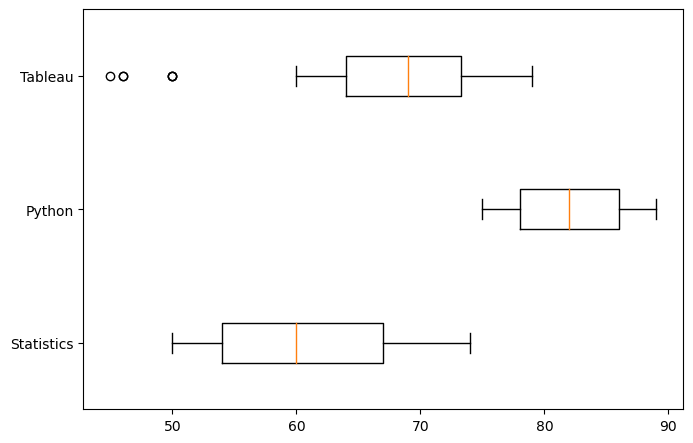

In [34]:
import matplotlib.pyplot as plt


Statistics_data=score_df['Statistics'].tolist()
Python_data=score_df['Python'].tolist()
Tableau_data=score_df['Tableau'].tolist()  
fig = plt.figure(figsize =(6, 4))                 #Setting figure size
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])           #it gives us places to draw the chart

#Creating boxplots of 3 groups of salaries
plt.boxplot([Statistics_data, Python_data, Tableau_data],vert=0)

#Setting y-axis label
ax.set_yticklabels(['Statistics', 'Python','Tableau'])          #for y-axis

#Showing the final plot
plt.show()

In [1]:
print("Statistics is more distributed as compared to python and tableau, so Statistics is most skewed")

Statistics is more distributed as compared to python and tableau, so Statistics is most skewed


Task 4
Visually present the distribution of scores obtained by the students in different subjects using box plots.
Identify the subject for which the scores are the most skewed.

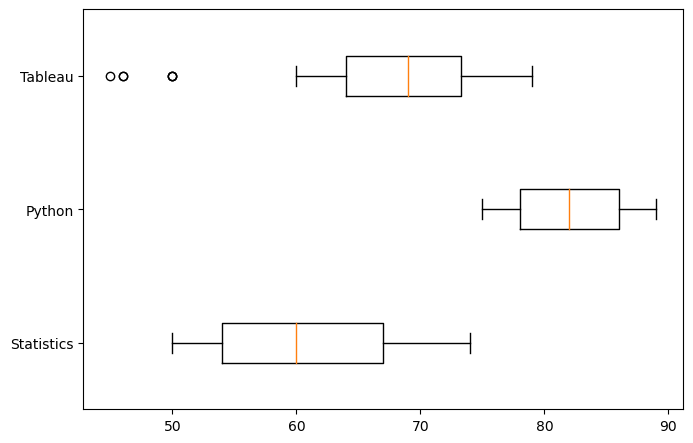

In [35]:
import matplotlib.pyplot as plt


Statistics_data=score_df['Statistics'].tolist()
Python_data=score_df['Python'].tolist()
Tableau_data=score_df['Tableau'].tolist()  
fig = plt.figure(figsize =(6, 4))                 #Setting figure size
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])           #it gives us places to draw the chart

#Creating boxplots of 3 groups of salaries
plt.boxplot([Statistics_data, Python_data, Tableau_data],vert=0)

#Setting y-axis label
ax.set_yticklabels(['Statistics', 'Python','Tableau'])          #for y-axis

#Showing the final plot
plt.show()

Statistics is more distributed as compared to python and tableau, so Statistics is most skewed


Task 5
Present the distribution of data for each subject using normal distribution curves (bell curves). Observe and report the Kurtosis analysis for every subject.

In [36]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

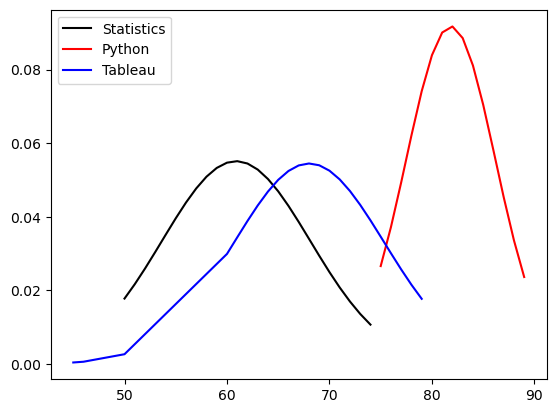

In [37]:
from scipy.stats import norm
plt.plot(sorted(score_df["Statistics"]), norm.pdf(sorted(score_df["Statistics"]), Statistics_mean, Statistics_std), color = "black", label ="Statistics" )
plt.plot(sorted(score_df["Python"]), norm.pdf(sorted(score_df["Python"]), Python_mean, Python_std) ,color = "r",label = "Python")
plt.plot(sorted(score_df["Tableau"]), norm.pdf(sorted(score_df["Tableau"]), Tableau_mean, Tableau_std) ,color = "b",label="Tableau" )
plt.legend()
plt.show()

In [38]:
from scipy.stats import kurtosis


In [39]:
kurtosis(sorted(score_df["Statistics"]))        

-1.2890343729055107

In [40]:
kurtosis(sorted(score_df["Python"]))                

-1.2748529079288784

In [41]:
kurtosis(sorted(score_df["Tableau"]))                    

1.442459054422362

In [2]:
print("Statistics is Mesokurtic")
print("Python is  leptokurtic")
print("Tableau is Mesokurtic ")

Statistics is Mesokurtic
Python is  leptokurtic
Tableau is Mesokurtic 
